In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
df = pd.read_csv("Xy-arch-accuracy.csv")
df = df.drop(labels='Unnamed: 0', axis=1)

In [4]:
df.columns

Index(['op-0', 'op-1', 'op-2', 'op-3', 'op-4', 'op-5', 'op-6', 'op-7', 'op-8',
       'op-9', 'op-10', 'op-11', 'op-12', 'op-13', 'op-14', 'op-15', 'op-16',
       'op-17', 'op-18', 'op-19', 'op-20', 'op-21', 'op-22', 'op-23', 'op-24',
       'op-25', 'op-26', 'op-27', 'op-28', 'op-29', 'op-30', 'op-31', 'op-32',
       'op-33', 'op-34', 'op-35', 'op-36', 'batch_size', 'learning_rate',
       'ranks_per_node', 'acc', 'dataset', 'exp'],
      dtype='object')

In [5]:
df.head()

,op-0,op-1,op-2,op-3,op-4,op-5,op-6,op-7,op-8,op-9,...,op-33,op-34,op-35,op-36,batch_size,learning_rate,ranks_per_node,acc,dataset,exp
0,13.0,0.0,6.0,0.0,0.0,13.0,1.0,0.0,0.0,30.0,...,29.0,0.0,0.0,0.0,256.0,0.01,1.0,0.556206,airlines,AgE-1
1,3.0,1.0,20.0,0.0,0.0,21.0,1.0,0.0,0.0,7.0,...,9.0,0.0,0.0,0.0,256.0,0.01,1.0,0.636033,airlines,AgE-1
2,11.0,0.0,15.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,...,5.0,1.0,0.0,0.0,256.0,0.01,1.0,0.627279,airlines,AgE-1
3,22.0,0.0,22.0,0.0,0.0,11.0,0.0,0.0,0.0,11.0,...,20.0,0.0,0.0,0.0,256.0,0.01,1.0,0.556206,airlines,AgE-1
4,26.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,0.0,26.0,...,6.0,1.0,1.0,1.0,256.0,0.01,1.0,0.641274,airlines,AgE-1


In [6]:
def get_Xy(df, dataset_names=None, exp_names=None, feature_names=None, prop=0.01):

    if dataset_names is not None:
        df = df[df.dataset.isin(dataset_names)]
        
    if exp_names is not None:
        df = df[df.exp.isin(exp_names)]
    
    dataset_names = df.dataset.unique()
    dfs = []
    N_list = []
    
    for dataset_name in dataset_names:
        N = int(0.5 + prop * df[(df.dataset == dataset_name)].shape[0])
        print(f"N = {N} for dataset: {dataset_name}")
        N_list.append(N)
        dfs.append(df[(df.dataset == dataset_name)].sort_values("acc", ascending=False)[:N])
        
    concat_df = pd.concat(dfs, axis=0).reset_index()
    
    X = concat_df[feature_names].to_numpy()
    y = concat_df.acc.to_numpy()
    
    return X, y, N_list

In [7]:
def PCA(X):
    from sklearn import decomposition
    pca = decomposition.PCA(n_components=2)
    u = pca.fit_transform(X)

    return u, pca.explained_variance_ratio_

In [9]:
exp_names = ["AgEBO-NR-LR-BS"]
feature_names = {
    "$H_a$": [f"op-{i}" for i in range(37)],
    "$H_m$": ["batch_size", "learning_rate", "ranks_per_node"],
}

U_list = []
N_list = []
V_list = [] # Explained variance ratio

for k,v in feature_names.items():
    X, _, N = get_Xy(df, None, exp_names, feature_names=v)
    N_list.append(N)
    
    U, V = PCA(X)
    U_list.append(U)
    V_list.append(V)

N = 12 for dataset: airlines
N = 14 for dataset: albert
N = 8 for dataset: covertype
N = 13 for dataset: dionis
N = 12 for dataset: airlines
N = 14 for dataset: albert
N = 8 for dataset: covertype
N = 13 for dataset: dionis


<IPython.core.display.Javascript object>


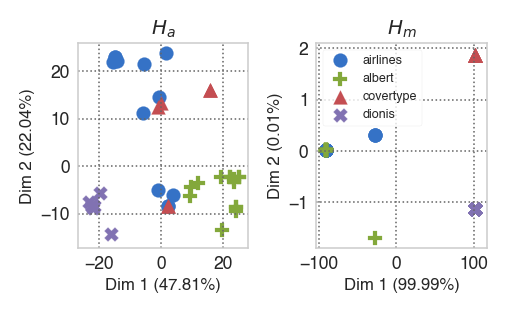

In [13]:
%matplotlib notebook

import seaborn as sns

width = 1.692*3
height = width/1.618

markers = ["o", "P", "^", "X"]
labels = df.dataset.unique()

plt.figure(figsize=(width,height))
for i, (U, N, V, name) in enumerate(zip(U_list, N_list, V_list, feature_names.keys())):
    plt.subplot(1, 2, i+1)
    plt.title(name)

    plt.grid(b=True, which='major', color='#666666', linestyle=':')
    
    cur = 0
    for n, m, l in zip(N, markers, labels):
        plt.scatter(U[cur:cur+n,0], U[cur:cur+n,1], marker=m, label=l, s=100)
        cur += n

    plt.xlabel(f"Dim 1 ({V[0]*100:.2f}%)", fontsize=12)
    plt.ylabel(f"Dim 2 ({V[1]*100:.2f}%)", fontsize=12)
    if i == 1:
        plt.legend(loc='best', fancybox=True, shadow=False, fontsize=9)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=False, ncol=1, fontsize=10)
plt.tight_layout()
plt.show()